In [1]:
import requests
import tweepy as tw
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
import re
import pandas as pd
import json
import datetime
import time
import csv
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
twet_amz = pd.read_csv('AMZN_Comp.csv')
twet_fb = pd.read_csv('FB_Comp.csv')
twet_apl = pd.read_csv('AAPL_Comp.csv')

C:\Users\natal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\natal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
twet_amz['hashtag'] = '$AMZN'
twet_fb['hashtag'] = '$FB'
twet_apl['hashtag'] = '$AAPL'

In [4]:
twit_data = pd.concat([twet_amz, twet_fb, twet_apl], axis=0)

In [5]:
twit_data.rename(columns = {'created_at':'date'}, inplace = True)

In [6]:
twit_data.rename(columns = {'reshares':'retweets'}, inplace = True)

In [7]:
twit_data['date'] = twit_data['date'].str.replace('T',' ')

In [8]:
twit_data['date'] = twit_data['date'].str.replace('Z',' ')

In [9]:
df = twit_data.drop('user', inplace=True, axis=1)

In [10]:
df = twit_data.drop('source', inplace=True, axis=1)

In [11]:
df = twit_data.drop('mentioned_users', inplace=True, axis=1)

In [12]:
df = twit_data.drop('entities', inplace=True, axis=1)

In [13]:
df = twit_data.drop('id', inplace=True, axis=1)

In [14]:
df = twit_data.drop('conversation', inplace=True, axis=1)

In [15]:
df = twit_data.drop('links', inplace=True, axis=1)

In [16]:
df = twit_data.drop('reshare_message', inplace=True, axis=1)

In [17]:
df = twit_data.drop('owned_symbols', inplace=True, axis=1)

In [18]:
df = twit_data.drop('Unnamed: 11', inplace=True, axis=1)

In [20]:
df = twit_data.drop('symbols', inplace=True, axis=1)

In [ ]:
df = twit_data.drop('Unnamed: 0.1', inplace=True, axis=1)
df = twit_data.drop('Unnamed: 0', inplace=True, axis=1)

In [22]:
twit_data['likes'] = twit_data['likes'].fillna(0)
twit_data['retweets'] = twit_data['retweets'].fillna(0)

In [23]:
twit_data.head()

,Unnamed: 0,Unnamed: 0.1,body,date,likes,retweets,hashtag
0,0,0,$AMZN Simulated 3355.0 dollar CALLS for Wednes...,2022-01-05 03:00:20,0.0,0.0,$AMZN
1,1,1,$AMZN breakout soon 📢💄💍💎📢,2022-01-05 02:49:55,10.0,0.0,$AMZN
2,2,2,@M000 I thought TSLA of AR was stretching it a...,2022-01-05 02:46:45,0.0,0.0,$AMZN
3,3,3,$AMZN Rejected 3343.50,2022-01-05 02:43:35,1.0,1.0,$AMZN
4,4,4,$GME $AMZN lol assholes look at this hahah,2022-01-05 02:42:56,2.0,0.0,$AMZN


In [24]:
twit_data['score'] = twit_data['body'].apply(lambda review: sid.polarity_scores(review))

twit_data.head()

,Unnamed: 0,Unnamed: 0.1,body,date,likes,retweets,hashtag,score
0,0,0,$AMZN Simulated 3355.0 dollar CALLS for Wednes...,2022-01-05 03:00:20,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,1,$AMZN breakout soon 📢💄💍💎📢,2022-01-05 02:49:55,10.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,2,@M000 I thought TSLA of AR was stretching it a...,2022-01-05 02:46:45,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3,3,$AMZN Rejected 3343.50,2022-01-05 02:43:35,1.0,1.0,$AMZN,"{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'comp..."
4,4,4,$GME $AMZN lol assholes look at this hahah,2022-01-05 02:42:56,2.0,0.0,$AMZN,"{'neg': 0.302, 'neu': 0.476, 'pos': 0.222, 'co..."


In [25]:
twit_data['compound']  = twit_data['score'].apply(lambda score_dict: score_dict['compound'])

twit_data.head()

,Unnamed: 0,Unnamed: 0.1,body,date,likes,retweets,hashtag,score,compound
0,0,0,$AMZN Simulated 3355.0 dollar CALLS for Wednes...,2022-01-05 03:00:20,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,1,1,$AMZN breakout soon 📢💄💍💎📢,2022-01-05 02:49:55,10.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2,2,@M000 I thought TSLA of AR was stretching it a...,2022-01-05 02:46:45,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,3,3,$AMZN Rejected 3343.50,2022-01-05 02:43:35,1.0,1.0,$AMZN,"{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'comp...",-0.5106
4,4,4,$GME $AMZN lol assholes look at this hahah,2022-01-05 02:42:56,2.0,0.0,$AMZN,"{'neg': 0.302, 'neu': 0.476, 'pos': 0.222, 'co...",-0.2500


In [31]:
        twit_data['Weights'] = twit_data.apply(lambda row: (0.01
                                          if row['likes'] == 0 and row['retweets'] == 0
                                          else (int(row['likes'])+int(row['retweets']))*10
                                                     ), axis=1)
        twit_data['Total_Weighted_Score'] = twit_data.apply(lambda row: (row['compound']* row['Weights']),
        axis=1)

In [32]:
twit_data

,body,date,likes,retweets,hashtag,score,compound,Weights,Total_Weighted_Score
0,$AMZN Simulated 3355.0 dollar CALLS for Wednes...,2022-01-05 03:00:20,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.01,0.000000
1,$AMZN breakout soon 📢💄💍💎📢,2022-01-05 02:49:55,10.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,100.00,0.000000
2,@M000 I thought TSLA of AR was stretching it a...,2022-01-05 02:46:45,0.0,0.0,$AMZN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.01,0.000000
3,$AMZN Rejected 3343.50,2022-01-05 02:43:35,1.0,1.0,$AMZN,"{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'comp...",-0.5106,20.00,-10.212000
4,$GME $AMZN lol assholes look at this hahah,2022-01-05 02:42:56,2.0,0.0,$AMZN,"{'neg': 0.302, 'neu': 0.476, 'pos': 0.222, 'co...",-0.2500,20.00,-5.000000
...,...,...,...,...,...,...,...,...,...
479987,$AAPL break 171 and she flushes,2022-02-04 15:55:21,2.0,0.0,$AAPL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,20.00,0.000000
479988,$AAPL is a growth stock now?,2022-02-04 15:55:07,0.0,0.0,$AAPL,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...",0.3818,0.01,0.003818
479989,$AAPL 🍏 Do you know what time it is…yep,2022-02-04 15:53:16,0.0,0.0,$AAPL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.01,0.000000
479990,$AAPL lol u buy the dip on it,2022-02-04 15:53:11,0.0,0.0,$AAPL,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp...",0.4215,0.01,0.004215


In [ ]:
stocks = ['AAPL', 'AMZN', 'FB', 'NFLX', 'GOOG']

In [35]:
warnings.filterwarnings("ignore")
nltk.download('vader_lexicon')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [55]:
 def vaderScoreGenerator(tw_sent):
        '''
        This function takes in the dataframe that we appeneded earlier and computes the sentiment
        scores and extracts the polarity scores using the Vader Sentiment Analyzer
        '''
        sia = SentimentIntensityAnalyzer()
        tw_sent['Negative'] = tw_sent['Content'].apply(lambda x:sia.polarity_scores(str(x))['neg'])
        tw_sent['Neutral'] = tw_sent['Content'].apply(lambda x:sia.polarity_scores(str(x))['neu'])
        tw_sent['Positive'] = tw_sent['Content'].apply(lambda x:sia.polarity_scores(str(x))['pos'])
        tw_sent['Compound'] = tw_sent['Content'].apply(lambda x:sia.polarity_scores(str(x))
        ['compound'])



In [56]:
def get_subset(stocks, tw_sent):
            '''
            This function apparently takes the stock name and the data frame that we read above
            and subseqiuently returns the mastert ticker
            '''
            df_master_ticker = twit_data.loc[twit_data['hashtag'] == stocks]
            return df_master_ticker



In [57]:
    def appendToMaster(tw_sent):
        '''
        This function apparently takes the data frame that we preprocessed earlier and appends it 
        to the master csv file that we have been collecting.
        '''
        df_master_ticker.to_csv('Twitter_Data_Master.csv',
        mode='a', header=False)

In [58]:
    def generateDataforEachStock():
        '''
        This function essentially reads the master csv file reads it and subsets the ticker
        to get the average sentiment score overall.
        '''
        df_twitter_master = pd.read_csv("Twitter_Data_Master.csv")

In [61]:

        def get_score(tw_sent):
            '''
            This function groups the total weighted score metric by date and aggreates it by sum
            We then return the dataframe which gives the mean sentiment score of a particular stock 
            '''
            df_grp = tw_sent.groupby('date')['Total_Weighted_Score'].aggregate(['sum',
            'count'])
            df_grp['Sentiment_Score'] = df_grp.apply(lambda x: (x['sum']/x['count']), axis=1)
            return df_grp


        df_re = get_subset('$AAPL', tw_sent)
        df_grp = get_score(df_re)
        return df_grp

SyntaxError: 'return' outside function (Temp/ipykernel_872/1325588373.py, line 14)

In [ ]:
csvFile = open('NFLX_N.csv', 'a')

csvWriter = csv.writer(csvFile)

query = "$NFLX"

for tweet in tw.Cursor(api.search_tweets,
                       q=query,
                       lang="en",
                       since=start,
                       result_type="recent"
                       ).items():

    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
    print(tweet.created_at, tweet.text)
csvFile.close()

In [ ]:
csvFile = open('GOOG.csv', 'a')

csvWriter = csv.writer(csvFile)

start = "2022-01-01"
end = "2021-12-31"
query = "$GOOG"

for tweet in tw.Cursor(api.search_tweets,
                       q=query,
                       lang="en",
                       since=start,
                       result_type="recent"
                       ).items():

    csvWriter.writerow([tweet.created_at, tweet.retweeted, tweet.favorited, tweet.text.encode('utf-8')])
    print(tweet.created_at, tweet.retweeted, tweet.favorited, tweet.text)
csvFile.close()

In [ ]:
GOOG = pd.read_csv("GOOG.csv")
GOOG

In [47]:
tw_1 = pd.read_csv("AAPL.csv").astype(str)
tw_2 = pd.read_csv("AMZN.csv").astype(str)
tw_4 = pd.read_csv("NFLX.csv").astype(str)
tw_5 = pd.read_csv("GOOG.csv").astype(str)

In [48]:
tw_3 = pd.read_csv("FB.csv").astype(str)


In [49]:
tw_1

,Date/Time,Hashtag,Content
0,2022-05-09 21:25:01+00:00,$AAPL,b'$TSLA to 650 by Thursday. \n$TWTR to 42 by F...
1,2022-05-09 21:24:45+00:00,$AAPL,b'Count of mentions for the tickers in last 1 ...
2,2022-05-09 21:24:36+00:00,$AAPL,b'@huntdividends $AAPL $MSFT $V \n\n1 share ea...
3,2022-05-09 21:24:09+00:00,$AAPL,b'@davidgandler bravo. So proud that you sold ...
4,2022-05-09 21:23:14+00:00,$AAPL,b'RT @MoMo_A1Trader: So biggest money maker wa...
...,...,...,...
4227,2022-05-08 22:15:06+00:00,$AAPL,b'@ashwinibirla @amazonholder1 @ThanosCapital ...
4228,2022-05-08 22:14:45+00:00,$AAPL,b'RT @jonnajarian: $AAPL Airpod revenue versus...
4229,2022-05-08 22:13:54+00:00,$AAPL,b'RT @StockMKTNewz: Apple $AAPL should change ...
4230,2022-05-08 22:12:57+00:00,$AAPL,b'RT @jonnajarian: $AAPL Airpod revenue versus...


In [50]:
tw_sent = pd.concat([tw_1, tw_2, tw_3, tw_4, tw_5], axis=0)

In [53]:
tw_sent

,Date/Time,Hashtag,Content,Content,Unnamed: 3
0,2022-05-09 21:25:01+00:00,$AAPL,b'$TSLA to 650 by Thursday. \n$TWTR to 42 by F...,NaN,NaN
1,2022-05-09 21:24:45+00:00,$AAPL,b'Count of mentions for the tickers in last 1 ...,NaN,NaN
2,2022-05-09 21:24:36+00:00,$AAPL,b'@huntdividends $AAPL $MSFT $V \n\n1 share ea...,NaN,NaN
3,2022-05-09 21:24:09+00:00,$AAPL,b'@davidgandler bravo. So proud that you sold ...,NaN,NaN
4,2022-05-09 21:23:14+00:00,$AAPL,b'RT @MoMo_A1Trader: So biggest money maker wa...,NaN,NaN
...,...,...,...,...,...
4968,2022-04-29 23:59:43+00:00,$GOOG,"b""@Whitey102796 @coinbase @RobinhoodApp I agre...",NaN,NaN
4969,2022-04-29 23:52:07+00:00,$GOOG,b'RT @ETFStockReport: #Stockmarket @ETFStockRe...,NaN,NaN
4970,2022-04-29 23:51:46+00:00,$GOOG,b'Panic Attack \n$SPX $SPY $IWM $AAPL $AMZN $...,NaN,NaN
4971,2022-04-29 23:51:31+00:00,$GOOG,b'RT @ETFStockReport: #Stockmarket @ETFStockRe...,NaN,NaN


In [52]:
tw_sent['score'] = tw_sent['Content'].apply(lambda review: sid.polarity_scores(review))

AttributeError: 'float' object has no attribute 'encode'

In [ ]:
tw_sent['compound']  = tw_sent['score'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
tw_sen = tw_sent.assign(result=tw_sent['Hashtag'].str.replace(r'$', ''))
tw_sen

In [ ]:
tw_sent

Exploratory Data Analysis

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.patches.Wedge at 0x129cfe5b040>,
 [Text(-0.061471395364546474, 1.0982810512577987, '$AAPL'),
  Text(-0.7141879472251007, -0.8366215249671723, '$AMZN'),
  Text(0.7954030901367384, -0.7598249299680341, '$FB')],
 [Text(-0.033529852017025345, 0.599062391595163, '51.8%'),
  Text(-0.3895570621227821, -0.4563390136184576, '23.9%'),
  Text(0.4338562309836755, -0.41444996180074584, '24.3%')])

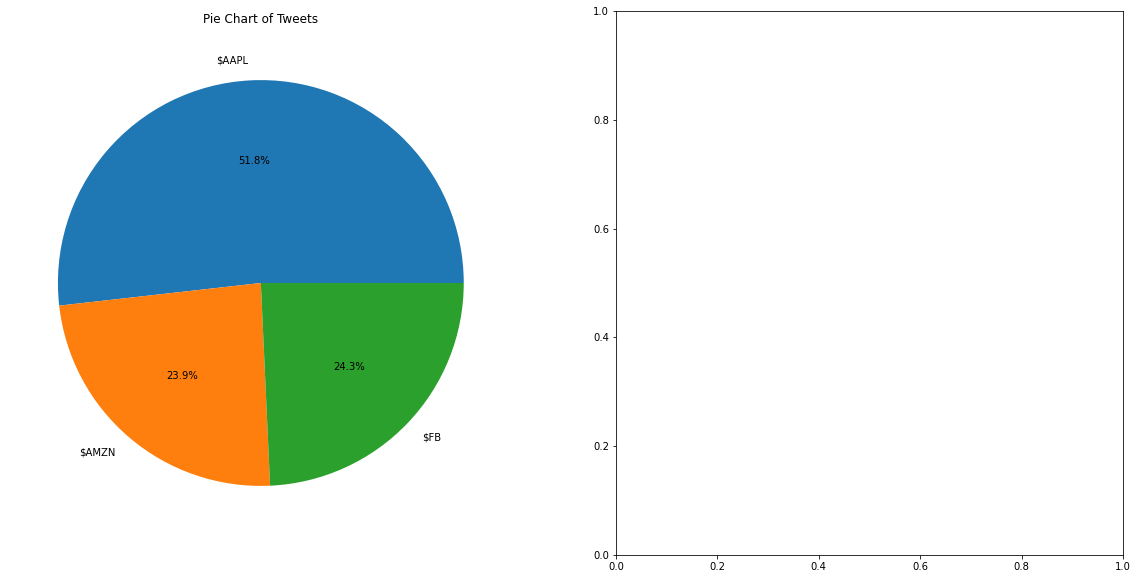

<Figure size 720x720 with 0 Axes>

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
#plt.title('Pie Chart of overall submissions Tag wise')
fig = plt.figure(figsize=(10,10))

dfgroup = twit_data.groupby(['hashtag'])['body'].count().reset_index()
ax1.set_title('Pie Chart of Tweets')
ax1.pie(dfgroup["body"],labels=dfgroup["hashtag"], autopct='%1.1f%%')

In [ ]:
sns.pairplot(adve, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()